<a href="https://colab.research.google.com/github/crislainesc/Jogo-da-Velha/blob/master/Atividade_Semana_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Estatística e Probabilidade**

Data set com atributos clínicos para avaliação do evento de morte por insuficiência cardíaca.

*   Os dados descrevem condições clínicas como diabetes, anemia e características pessoais tais como sexo, idade e tabagismo.
*   [Heart Failure Prediction](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data)
*   Serão testadas hipóteses em relação as características de gênero (feminino e masculino).


# **Leitura dos dados**

In [1]:
# criando ambiente no google drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import sqrt
import numpy as np
from scipy.stats import t

In [3]:
# lendo arquivo csv
dados = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Estatística e Probabilidade/Semana 7/heart_failure_clinical_records_dataset.csv")
dados.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# separando os pacientes pelo gênero masculino e feminino
homens = dados[dados.sex == 1].reset_index(drop=True)
mulheres = dados[dados.sex == 0].reset_index(drop=True)

# **Testes de hipótese**

**Testando o atributo evento de morte.**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


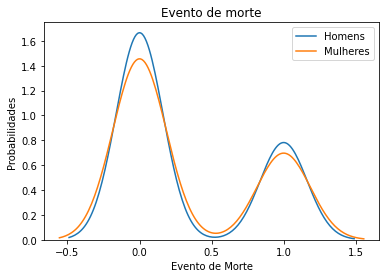

In [5]:
sns.distplot(homens.DEATH_EVENT, hist=False, rug=False, label="Homens")
sns.distplot(mulheres.DEATH_EVENT, hist=False, rug=False, label="Mulheres")
plt.xlabel("Evento de Morte")
plt.ylabel("Probabilidades")
plt.title("Evento de morte")
plt.legend()
plt.show()

In [6]:
# calculando estatísticas das amostras
x1 = homens.DEATH_EVENT.mean()
s1 = homens.DEATH_EVENT.std()

x2 = mulheres.DEATH_EVENT.mean()
s2 = mulheres.DEATH_EVENT.std()

print(x1, s1)
print(x2, s2)

0.31958762886597936 0.4675233335470303
0.3238095238095238 0.4701725970984183


In [7]:
n1 = homens.shape[0]
n2 = mulheres.shape[0]
print("Quantidade de homens: ",n1)
print("Quantidade de mulheres: ",n2)

Quantidade de homens:  194
Quantidade de mulheres:  105


**Testando a hipótese de que as duas distribuições tem a mesma média, ao nível de 10%.**

1. Hipóteses

 *   $H_0 : \mu_1 - \mu_2 = 0$
 *   $H_a : \mu_1 - \mu_2 \neq 0$

2. Nível de significância

 *   $\alpha = 0.10$


In [8]:
# estabelecendo nível de confiança do teste
alpha = 0.10

3. Regiões de não-rejeição e críticas

In [9]:
zc = norm.ppf(1-alpha/2)
zc

1.6448536269514722

4. Estatística do teste
  * $Z_{calc} = \dfrac{(\overline{x_1} - \overline{x_2}) - (\mu_1 - \mu_2)}{\sqrt{\dfrac{s_1^2}{n_1} + \dfrac{s_2^2}{n_2}}}$

In [10]:
z_calc = (x1-x2)/(sqrt((s1**2)/n1 + (s2**2)/n2))
z_calc

-0.07426234407237912

5. Decisão

In [11]:
# tomando a decisão
if z_calc < -zc or z_calc > zc:
  print("Rejeita H0")
else:
  print("Falha em rejeitar H0")

Falha em rejeitar H0


A estatística do teste está dentro da região de não-rejeição, ou seja as médias de evento de morte em homens e mulheres dos pacientes observados são estatisticamente equivalentes.

**Testando o atributo plaquetas**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


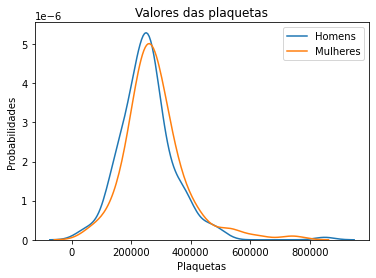

In [12]:
sns.distplot(homens.platelets, hist=False, rug=False, label="Homens")
sns.distplot(mulheres.platelets, hist=False, rug=False, label="Mulheres")
plt.xlabel("Plaquetas")
plt.ylabel("Probabilidades")
plt.title("Valores das plaquetas")
plt.legend()
plt.show()

In [13]:
# calculando estatísticas das amostras
x1 = homens.platelets.mean()
s1 = homens.platelets.std()

x2 = mulheres.platelets.mean()
s2 = mulheres.platelets.std()

print(x1, s1)
print(x2, s2)

254370.24989690728 94447.36393901039
279964.0216190477 102108.74955789119


**Testando a hipótese de que as duas distribuições tem a mesma média, ao nível de 10%.**

1. Hipóteses

 *   $H_0 : \mu_1 - \mu_2 = 0$
 *   $H_a : \mu_1 - \mu_2 \neq 0$

2. Nível de significância

 *   $\alpha = 0.10$


In [14]:
# estabelecendo nível de confiança do teste
alpha = 0.10

3. Regiões de não-rejeição e críticas

In [15]:
zc = norm.ppf(1-alpha/2)
zc

1.6448536269514722

4. Estatística do teste
  * $Z_{calc} = \dfrac{(\overline{x_1} - \overline{x_2}) - (\mu_1 - \mu_2)}{\sqrt{\dfrac{s_1^2}{n_1} + \dfrac{s_2^2}{n_2}}}$

In [16]:
z_calc = (x1-x2)/(sqrt((s1**2)/n1 + (s2**2)/n2))
z_calc

-2.1234120204614633

5. Decisão

In [17]:
# tomando a decisão
if z_calc < -zc or z_calc > zc:
  print("Rejeita H0")
else:
  print("Falha em rejeitar H0")

Rejeita H0


Tendo como base as regiões de não rejeição que estão no intervalo $[-1.64 < x < 1.64]$ podemos tomar a decisão de que as médias das amostras coletadas para o nível de plaquetas dos pacientes observados são estatisticamente divergentes com 10% de risco de rejeitarmos uma hipótese verdadeira.

**Testando o atributo idade em uma amostra pequena.**

In [18]:
homens = homens[:20]
mulheres = mulheres[:20]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


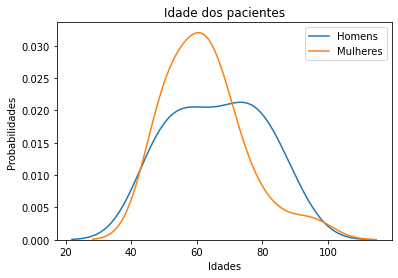

In [19]:
# distribuição de probabilidade comparando as idades das duas amostras
sns.distplot(homens.age, hist=False, rug=False, label="Homens")
sns.distplot(mulheres.age, hist=False, rug=False, label="Mulheres")
plt.xlabel("Idades")
plt.ylabel("Probabilidades")
plt.title("Idade dos pacientes")
plt.legend()
plt.show()
                                                                

In [20]:
x1 = homens.age.mean()
s1 = homens.age.std()

x2 = mulheres.age.mean()
s2 = mulheres.age.std()

print(x1, s1)
print(x2, s2)

66.25 14.00704709855195
62.45 12.002083152519816


**Testando a hipótese de que as duas distribuições tem a mesma média, ao nível de 10%.**

1. Hipóteses

 *   $H_0 : \mu_1 - \mu_2 = 0$
 *   $H_a : \mu_1 - \mu_2 \neq 0$

2. Nível de significância

 *   $\alpha = 0.10$

In [21]:
n1 = homens.shape[0]
n2 = mulheres.shape[0]

3. Regiões de não-rejeição e críticas

In [22]:
phi = n1 -1 if n1 < n2 else n2 - 1

In [23]:
# recuperando t na tabela
t_alpha_phi = t.ppf(1 - alpha/2, phi)
t_alpha_phi

1.729132811521367

4. Estatística do teste para variâncias diferentes

  $t_{calc} = \dfrac{(\overline{x_1} - \overline{x_2})-(\mu_1 - \mu_2)}{\sqrt{\dfrac{s_1^2}{n_1}+\dfrac{s_2^2}{n_2}}}$

In [26]:
t_calc = (x1-x2)/(sqrt((s1**2)/n1 + (s2**2/n2)))
t_calc

0.9213002881378345

5. Decisão

In [25]:
if t_calc < -abs(t_alpha_phi) or t_calc > abs(t_alpha_phi):
  print("Rejeite H0")
else:
  print("Falha em rejeitar H0")

Falha em rejeitar H0


Apesar das médias de idades possuirem diferença numérica, com base no teste de hipóteses é possível afirmar que tais médias são estatísticamente semelhantes.

# **Conclusões**

Analisando atributos como evento de morte, plaquetas e idades dos pacientes, pôde-se presumir como os mesmos se comportariam utilizando testes de hipóteses. Houve atributos como o de evento de morte e idade que não possuíram uma diferença estatística significante, já o atributo com a medição do nível de plaquetas mostrou possuir tal diferença, rejeitando a hipótese principal e dando razão a hipótese alternativa.